### Importando os módulos iniciais

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import seaborn as sns

sns.set_theme()

### Procedimento especial para manipular os dados quando estão em um arquivo zip

In [2]:
caminho_zip = 'PeNSE_2015_AMOSTRA2.zip'
arq_zip = ZipFile(caminho_zip)

In [3]:
arq_zip.infolist()

[<ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1538698>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1668113>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=141268>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=2385464>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=3101600>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=502340>,
 <ZipInfo filename='arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx' compress_type=deflate external_attr=0x20 file_size=11757

In [4]:
arq_zip.namelist()

['arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [5]:
caminho_arquivo_no_zip = arq_zip.namelist()[0]

dados = pd.read_csv(arq_zip.open(caminho_arquivo_no_zip), sep=';')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,"299,735235",1,2,4,1,5,1,296


In [6]:
#caminho_arquivo_no_zip_dicio = arq_zip.namelist()[9]
#df = pd.read_excel(arq_zip.open(caminho_arquivo_no_zip_dicio))
#df

### Início da exploração do data frame

In [7]:
dados.shape

(16556, 181)

In [8]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(7), int64(171), object(3)
memory usage: 22.9+ MB


Observamos que somente 3 colunas são do tipo objeto, vamos descobrir quais são:

In [10]:
dados.select_dtypes(include='object')

,VB17003,VB17004,PESO
0,"37,1",157,"299,735235"
1,"50,2",152,"355,170081"
2,"48,2","161,4","299,735235"
3,"69,4","172,5","355,170081"
4,"78,9","167,5","299,735235"
...,...,...,...
16551,"56,7","167,9","447,815539"
16552,"61,9","185,8","592,50744"
16553,"60,9","159,4","401,131512"
16554,"47,3","157,8","442,718091"


Podemos observar que os dados object são devido ao uso de vírgulas para separar a casa decimal

## A solução é modificando a importação

In [11]:
dados = pd.read_csv(arq_zip.open(caminho_arquivo_no_zip), sep=';', thousands='.', decimal=',')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296


In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [13]:
dados.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


---

In [14]:
# de acordo com o dicionário dos dados, é a coluna que indica o sexo dos alunos
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [15]:
dados['VB01001'].value_counts(normalize=True)

1    0.500544
2    0.499456
Name: VB01001, dtype: float64

In [16]:
dados['VB01001'].value_counts(normalize=True) * 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [17]:
# pergunta quanto a satisfação do aluno com seu próprio corpo
dados['VB11007'].value_counts()

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

In [18]:
dados['VB11007'].value_counts(normalize=True)

2     0.417975
1     0.278328
4     0.140493
3     0.109145
5     0.043126
99    0.010933
Name: VB11007, dtype: float64

In [19]:
frequencia = dados['VB11007'].value_counts()
percentual = dados['VB11007'].value_counts(normalize=True)
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual})
dist_freq

,Frequência,Percentual
2,6920,0.417975
1,4608,0.278328
4,2326,0.140493
3,1807,0.109145
5,714,0.043126
99,181,0.010933


In [20]:
respostas = {
    1: "Muito satisfeito",
    2: "Satisfeito",
    3: "Indiferente",
    4: "Insatisfeito",
    5: "Muito insatisfeito",
    99: "Não Informado"
}

dist_freq.rename(index=respostas, inplace=True)
dist_freq.rename_axis("Sentimento com relação ao seu corpo", axis=1, inplace=True)
dist_freq

Sentimento com relação ao seu corpo,Frequência,Percentual
Satisfeito,6920,0.417975
Muito satisfeito,4608,0.278328
Insatisfeito,2326,0.140493
Indiferente,1807,0.109145
Muito insatisfeito,714,0.043126
Não Informado,181,0.010933


---

### Calcular o IMC do dataframe

In [21]:
dados["VB17004"]

0        157.0
1        152.0
2        161.4
3        172.5
4        167.5
         ...  
16551    167.9
16552    185.8
16553    159.4
16554    157.8
16555    163.9
Name: VB17004, Length: 16556, dtype: float64

### Podemos observar que a altura é medida em contímetros

In [22]:
dados["IMC"] = dados["VB17003"]/ ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [23]:
classes = [0, 18.5, 25, 30, 60]
labels = ["abaixo", "normal", "sobrepeso", "obsidade"]

pd.cut(x=dados['IMC'], bins = classes, labels = labels, include_lowest = True)

0           abaixo
1           normal
2           normal
3           normal
4        sobrepeso
           ...    
16551       normal
16552       abaixo
16553       normal
16554       normal
16555       normal
Name: IMC, Length: 16556, dtype: category
Categories (4, object): ['abaixo' < 'normal' < 'sobrepeso' < 'obsidade']

In [24]:
dados['CLASSE_IMC'] = pd.cut(x=dados['IMC'], bins = classes, labels = labels, include_lowest = True)
dados[['IMC', 'CLASSE_IMC']]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [25]:
frequencia = dados["CLASSE_IMC"].value_counts()
percentual = dados["CLASSE_IMC"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
#dist_freq.rename(index = respostas, inplace = True)
#dist_freq.rename_axis("Sentimento em relação ao seu corpo", axis=1, inplace = True)
dist_freq

,Frequência,Percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obsidade,633,3.823387


In [26]:
# altura
dados["VB17004"]

0        157.0
1        152.0
2        161.4
3        172.5
4        167.5
         ...  
16551    167.9
16552    185.8
16553    159.4
16554    157.8
16555    163.9
Name: VB17004, Length: 16556, dtype: float64

In [27]:
dados["VB17004"].min()

124.1

In [28]:
dados["VB17004"].max()

195.3

### Regra de struges

In [29]:

tamanho_amostra = len(dados)

k = int((1 + ((10/3)*np.log10(tamanho_amostra))))
k

15

In [30]:
dados["CLASSE_ALTURA"] = pd.cut(x = dados["VB17004"],
       bins = k,
       include_lowest = True)

frequencia = dados["CLASSE_ALTURA"].value_counts()
percentual = dados["CLASSE_ALTURA"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq

,Frequência,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


In [31]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"])
frequencia_cruzada

VB01001,1,2
VB11007,,
1,2682,1926
2,3490,3430
3,950,857
4,786,1540
5,260,454
99,119,62


In [32]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"])
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,2682,1926
Satisfeito,3490,3430
Indiferente,950,857
Insatisfeito,786,1540
Muito insatisfeito,260,454
Não Informado,119,62


In [33]:
#normalização com os dados totais
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = True)
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,0.161996,0.116332
Satisfeito,0.210800,0.207176
Indiferente,0.057381,0.051764
Insatisfeito,0.047475,0.093018
Muito insatisfeito,0.015704,0.027422
Não Informado,0.007188,0.003745


In [34]:
# normalizado
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito insatisfeito,3.137444,5.490386
Não Informado,1.435984,0.749788


In [35]:
# Normalizado na linha
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "index") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito insatisfeito,36.414566,63.585434
Não Informado,65.745856,34.254144


---

<AxesSubplot:title={'center':'Distribuição de frequência de altura'}, xlabel='Altura (cm)', ylabel='Frequência'>

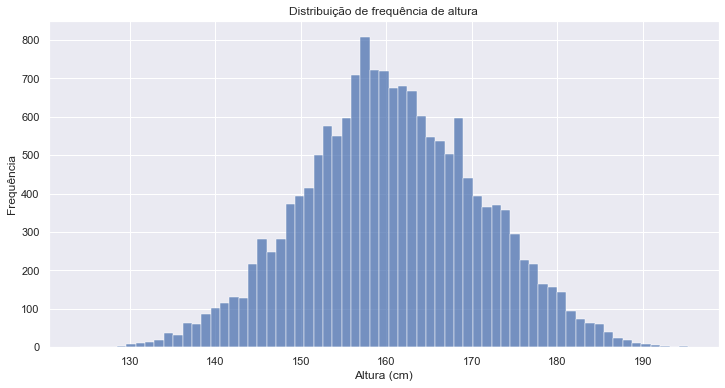

In [36]:
ax = sns.histplot(x='VB17004', data=dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência de altura')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Frequência')
ax

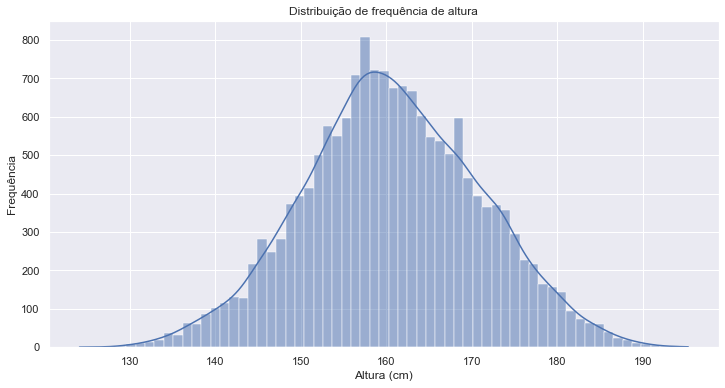

In [37]:
ax = sns.histplot(x='VB17004', data=dados, kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência de altura')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Frequência')
ax;

<AxesSubplot:title={'center':'Distribuição de frequência de altura'}, xlabel='Altura (cm)', ylabel='Frequência'>

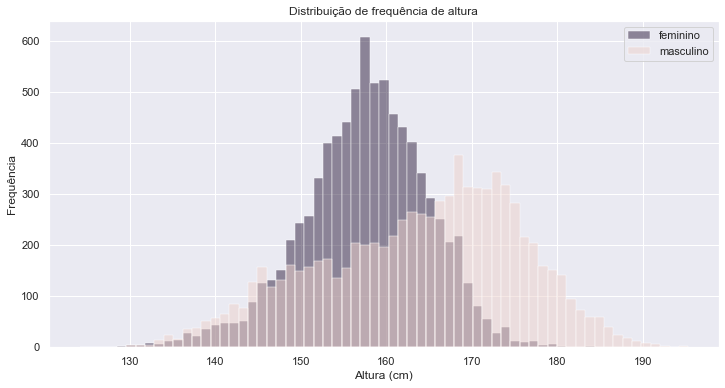

In [38]:
ax = sns.histplot(x='VB17004', data=dados, hue="VB01001")
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência de altura')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Frequência')
ax.legend(["feminino", "masculino"])
ax

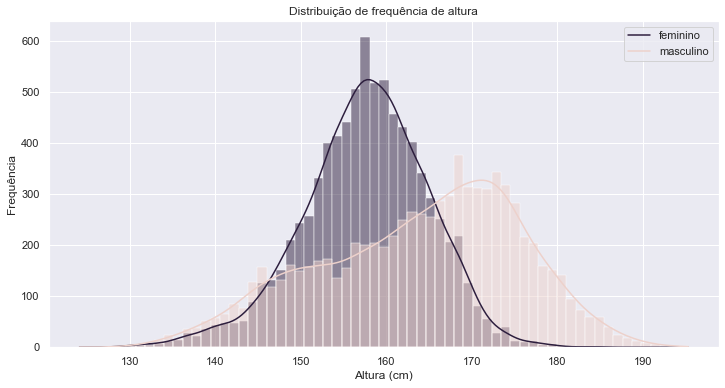

In [39]:
ax = sns.histplot(x='VB17004', data=dados, hue="VB01001", kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência de altura')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Frequência')
ax.legend(["feminino", "masculino"])
ax;

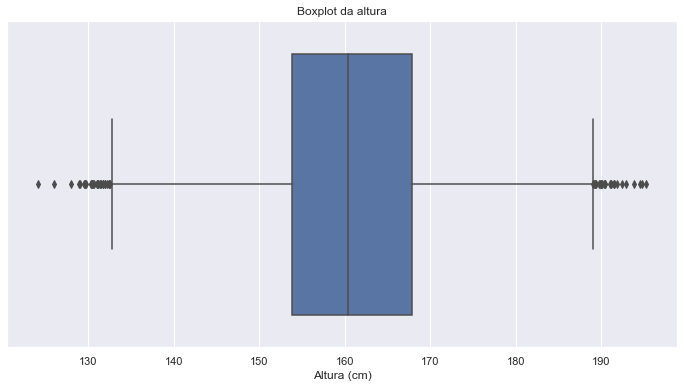

In [40]:
ax = sns.boxplot(data = dados, x='VB17004')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da altura')
ax.set_xlabel('Altura (cm)')
ax;

In [41]:
# minha maneira para confirmar os dados do boxplot, com exceção dos outliers
dados['VB17004'].describe().round(2)

count    16556.00
mean       160.71
std         10.34
min        124.10
25%        153.80
50%        160.40
75%        167.90
max        195.30
Name: VB17004, dtype: float64

In [42]:
# calcular os outliers
q1 = dados['VB17004'].quantile(0.25)
q3 = dados['VB17004'].quantile(0.75)
intervalo_inter_quartilico = q3 - q1
outlier_superior = q3 + (intervalo_inter_quartilico * 1.5)
outlier_inferior = q1 - (intervalo_inter_quartilico * 1.5)
print("Barra inferior ", outlier_inferior.round(2),' - Mediana ', dados['VB17004'].median()," - Barra superior ", outlier_superior)

Barra inferior  132.65  - Mediana  160.4  - Barra superior  189.05


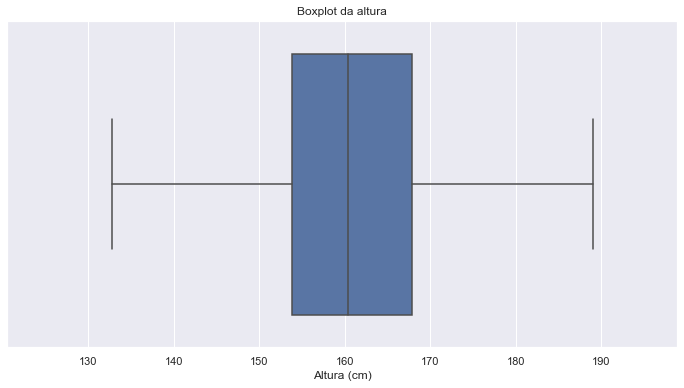

In [43]:
ax = sns.boxplot(data=dados, x='VB17004', fliersize=False)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da altura')
ax.set_xlabel('Altura (cm)')
ax;

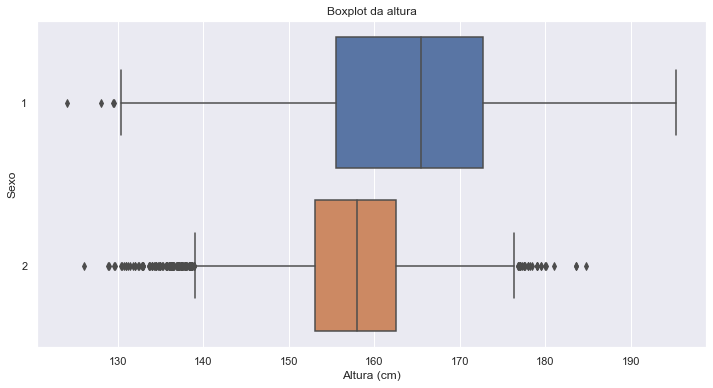

In [44]:
ax = sns.boxplot(data = dados, x='VB17004', y='VB01001', orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da altura')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Sexo')
ax;

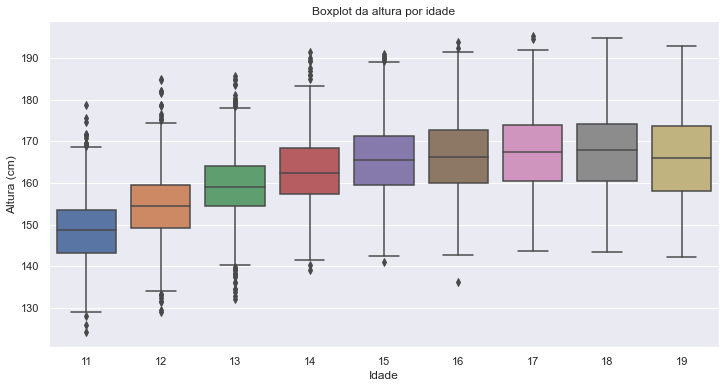

In [45]:
ax = sns.boxplot(data = dados, x='VB01003', y='VB17004')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da altura por idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura (cm)')
ax;

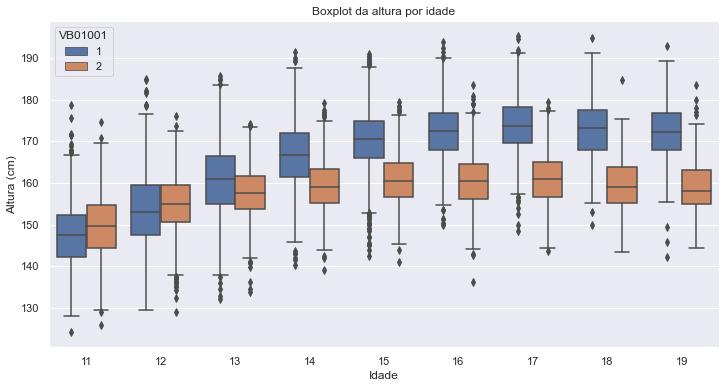

In [46]:
ax = sns.boxplot(data = dados, x='VB01003', y='VB17004', hue='VB01001')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da altura por idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura (cm)')
ax;

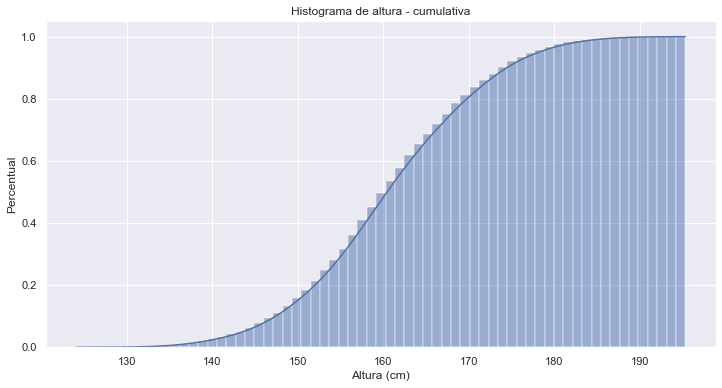

In [47]:
ax = sns.histplot(x='VB17004', data=dados, kde=True, cumulative=True, stat="density")
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma de altura - cumulativa')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Percentual')
ax;

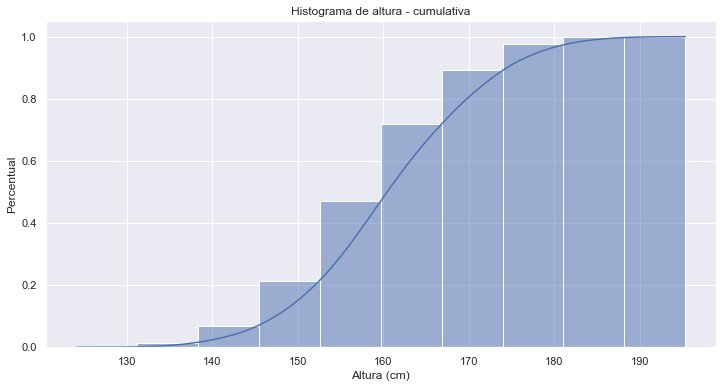

In [48]:
ax = sns.histplot(x='VB17004', data=dados, kde=True, cumulative=True, stat="density", bins=10)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma de altura - cumulativa')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Percentual')
ax;

---

### Medidas de centralidade

In [49]:
# média
dados['VB17004'].mean()

160.71311307078818

In [50]:
# média separada por sexo
dados.groupby('VB01001')['VB17004'].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [51]:
dados.groupby(['VB01001', 'VB01003'])['VB17004'].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

## Desafio

In [52]:
# conseguir o mesmo resultado do código anterior com crosstab

pd.crosstab(index=dados['VB01003'], columns=dados['VB01001'], aggfunc='mean', values=dados['VB17004'])

VB01001,1,2
VB01003,,
11,147.617753,149.522512
12,153.696764,154.965021
13,160.719801,157.673105
14,166.406922,159.340320
15,170.336297,160.759848
16,172.424933,160.386527
17,173.814341,160.907937
18,173.024561,159.438462
19,172.143158,158.977193


In [53]:
# moda
dados['VB17004'].mode()

0    160.0
dtype: float64

---

## Desafio
### Fazer um dicionário para os nomes das colunas

---

In [54]:
media_altura =  dados["VB17004"].mean()
dados["MEDIA_ALTURA"] = media_altura
diferenca_das_media = dados["VB17004"] - media_altura
dados["DIFERENCA_MEDIA"] = diferenca_das_media

diferenca_quadrado = diferenca_das_media**2
dados["DIFERENCA_QUADRADO"] = diferenca_quadrado

dados[["VB17004", "MEDIA_ALTURA", "DIFERENCA_MEDIA", "DIFERENCA_QUADRADO"]]

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [55]:
variancia_amostral = (1/(len(dados)-1)) * dados["DIFERENCA_QUADRADO"].sum()
variancia_amostral

106.91705244049119

In [56]:
desvio_padrao = np.sqrt(variancia_amostral)
desvio_padrao

10.340070233827776

In [57]:
dados["VB17004"].std()

10.3400702338278

---

In [58]:
# Intervalo de confiança de 95% de confiança
from statsmodels.stats.weightstats import zconfint

zconfint(dados["VB17004"].to_list())

(160.5556082427712, 160.87061789880892)

In [59]:
# intervalo de confiança com t test
from statsmodels.stats.weightstats import DescrStatsW

descricao_altura = DescrStatsW(dados["VB17004"])
descricao_altura.tconfint_mean()

(160.55559672649295, 160.87062941508717)

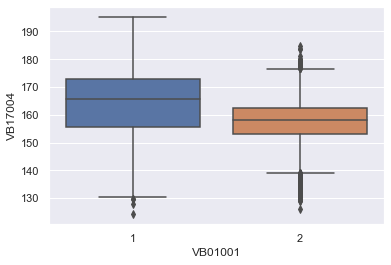

In [60]:
sns.boxplot(x = "VB01001", y = "VB17004", data=dados);

In [61]:
from statsmodels.stats.weightstats import ztest

distribuicao_altura_m = dados.query("VB01001 == 1")["VB17004"]
distribuicao_altura_f = dados.query("VB01001 == 2")["VB17004"]

_ , p_value = ztest(distribuicao_altura_m, distribuicao_altura_f)

p_value

0.0

### Esse valor dp p-value significa que há diferença entre as duas distribuições de alturas

In [62]:
from scipy.stats import normaltest

normaltest(distribuicao_altura_m)

NormaltestResult(statistic=341.30659152353655, pvalue=7.695118853996524e-75)

### Significa que a distribuição não é normal, o p-valor é menor que 0,05

## Esses testes não apresentaram diferença pois esse teste requer distribuição normal

---

# Teste de normalidade

In [63]:
normaltest(distribuicao_altura_f)

NormaltestResult(statistic=212.51572610499005, pvalue=7.125189471020874e-47)

### Significa que a distribuição não é normal, o p-valor é menor que 0,05

---

# Teste não-Paramétricos

In [64]:
from scipy.stats import ranksums

ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)